In [7]:
import glob, re
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from psrqpy import QueryATNF

### Fitting Orbital Period

In [10]:
# If you need to download the archival data onto your personal computer you may do so using this wget command. 
# !wget --no-parent -r 'https://www.gb.nrao.edu/~rlynch/files/20m-orbit/bestprof/' <-P $PATH>
# where $PATH is your desired directory to store the data. Default will be the directory where this notebook is saved.
# This notebook should be saved in the parent folder of the data with each set of pulsar observations in a separate subdirectory.
path = "/Users/jackson/Desktop/SDSS Pulsar/www.gb.nrao.edu/~rlynch/files/20m-orbit/bestprof" # point at the subdirectory you are looking at
path = "J0437-4715"

In [11]:
t = []
P = []

for i, fname in enumerate(glob.glob(path + "/" + "*.pfd.*")):
    with open(fname) as file:
        contents = file.read()
        contents = contents.split("/n")[0].split("\n")

    if i == 0:
        # Pull the name of the pulsar you are working with for plotting purposes
        pulsar = re.search(pattern := re.compile(r"J\d{4}[-|+]\d{4}"), contents[0]).group()

    t.append(float(contents[4].split()[4]))  # barycenter epoch
    P.append(float(contents[18].split()[4])) # observed barycenter period

In [12]:
query = QueryATNF(params=["Jname", 'S1400', "PB", "A1", "ECC", "F0", "MinMass"], psrs=[pulsar])
query.table

JNAME,PB,A1,PB_ERR,F0_ERR,S1400,S1400_ERR,ECC,F0,A1_ERR,MINMASS,ECC_ERR
,d,s,d,Hz,mJy,mJy,,Hz,s,solMass,
str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J0437-4715,5.7410459,3.36671444,4e-07,5e-13,150.2,1.6,1.91811e-05,173.6879458121843,5e-08,0.14028781285199107,1.5e-09


In [13]:
print(query.get_ephemeris(pulsar))

NAME      J0437-4715
JNAME     J0437-4715
PSRJ      J0437-4715
RAJ       04:37:15.8961737         	6.000000000000000e-07
DECJ      -47:15:09.110714         	0.000007000000000
PMRA      121.438999999999993      	0.002000000000000
PMDEC     -71.474999999999994      	0.002000000000000
PX        6.400000000000000        	0.050000000000000
POSEPOCH  54500
ELONG     50.468254929380144
ELAT      -67.872926774752955
PMELONG   86.013554315577181
PMELAT    -111.614402386077600
GL        253.394459330235719
GB        -41.963396759694270
RAJD      69.316234057083335       	2.500000000000000e-09
DECJD     -47.252530753888891      	1.944444444444444e-09
TYPE      HE
PML       62.870272830886492
PMB       126.108822610354608
DIST      0.156800000000000
DIST_DM   0.156000000000000
DIST_DM1  0.139000000000000
DIST1     0.156800000000000
DIST_A    0.156800000000000        	0.000300000000000
DMSINB    -1.768433886051311
ZZ        -0.077736483400915
XX        -8.333616740232936
YY        -0.11172944679746

In [19]:
print(P)

[5.75761568902289, 5.75736978368956, 5.75743692450131, 5.75750103292496, 5.75723515774632, 5.75769936346094, 5.7575051645832, 5.75750206695685, 5.75743179112573, 5.75755890862292, 5.7573059212111, 5.75756710462621, 5.75723544441377, 5.75755887796513, 5.7573045728278, 5.75768913114636, 5.75755589872144, 5.75766002253759, 5.75726237572109, 5.75737902104945, 5.75769729450851, 5.75736557993028, 5.7575, 5.75762085559939, 5.75726566092206, 5.75727136764541, 5.75761878864557, 5.75766424025547]


Text(0.5, 0, 'Observed Spin Period (ms)')

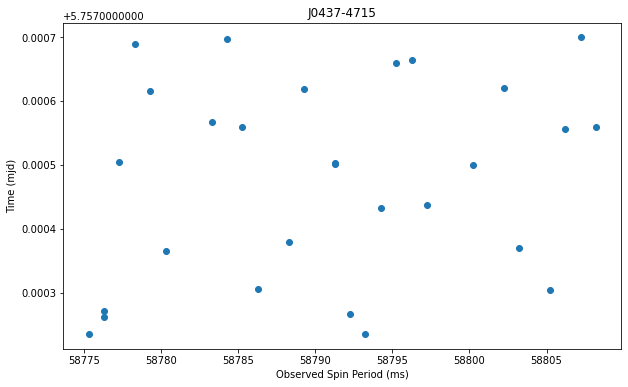

In [17]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(t, P, 'o')
ax.set_title(pulsar)
ax.set_ylabel("Time (mjd)")
ax.set_xlabel("Observed Spin Period (ms)")

In [15]:
P_func = lambda t, T0, PB, A1, Pi: Pi * (1 + 2 * np.pi * A1 / PB * np.cos(2 * np.pi * (t - T0) / PB))
# p0 is the intial guesses for the fit params
p0 = [58790, 5.5, 0, 0.0005]
popt, pcov = curve_fit(P_func, t, P, p0) # p_optimal and p_covariance matrix
T0, PB, A1, Pi = popt

Text(0.5, 0, 'Observed Spin Period (ms)')

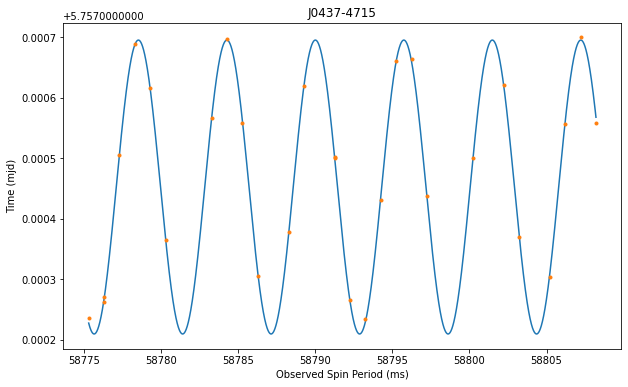

In [16]:
times = np.linspace(min(t), max(t), int(1e4))

fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(times, v_func(times, T0, PB, A1, Pi))
ax.plot(t, P, '.')

ax.set_title(pulsar)
ax.set_ylabel("Time (mjd)")
ax.set_xlabel("Observed Spin Period (ms)")

In [21]:
print(T0, PB, A1 * 86164.0905, Pi)
print(pcov)

58790.00057982258 5.740516117198288 3.31714726177561 5.757452449745953
[[ 1.54745895e-05 -1.58041866e-06 -2.55604306e-11 -5.10001566e-11]
 [-1.58041866e-06  5.31901535e-06  2.15695828e-11 -1.34582815e-10]
 [-2.55604306e-11  2.15695828e-11  4.04743848e-14 -2.69928667e-14]
 [-5.10001566e-11 -1.34582815e-10 -2.69928667e-14  6.51134056e-13]]
